In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Dataset/6 class csv.csv')
print("Dataset loaded successfully.")

Dataset loaded successfully.


In [5]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


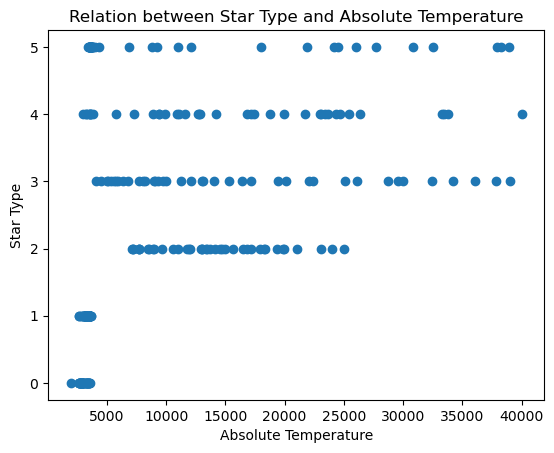

In [6]:
# Create a scatter plot between Star Type and Absolute Temperature
plt.scatter(df['Temperature (K)'], df['Star type'])
plt.title('Relation between Star Type and Absolute Temperature')
plt.xlabel('Absolute Temperature')
plt.ylabel('Star Type')
plt.show()

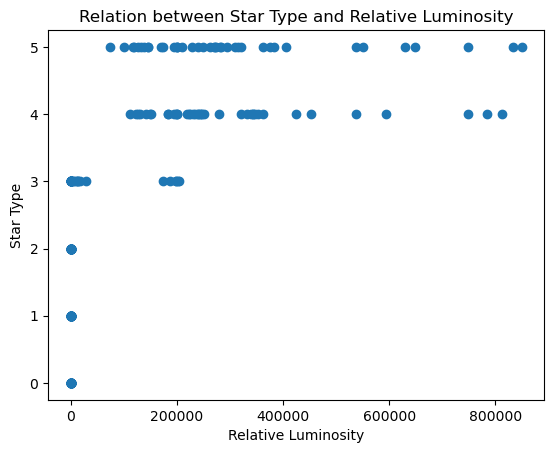

In [7]:
# Create a scatter plot between Star Type and Relative Luminosity
plt.scatter(df['Luminosity(L/Lo)'], df['Star type'])
plt.title('Relation between Star Type and Relative Luminosity')
plt.xlabel('Relative Luminosity')
plt.ylabel('Star Type')
plt.show()

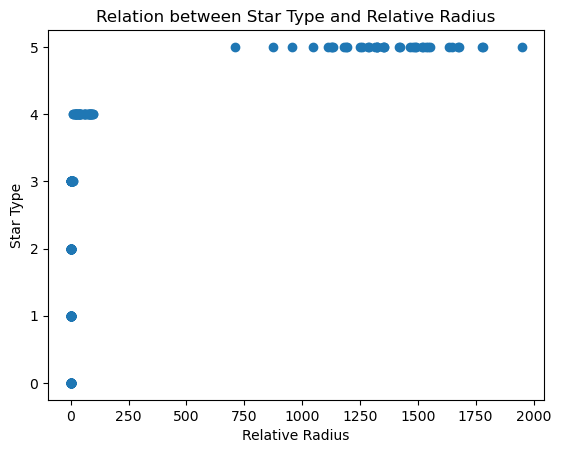

In [8]:
# Create a scatter plot between Star Type and Relative Radius
plt.scatter(df['Radius(R/Ro)'], df['Star type'])
plt.title('Relation between Star Type and Relative Radius')
plt.xlabel('Relative Radius')
plt.ylabel('Star Type')
plt.show()

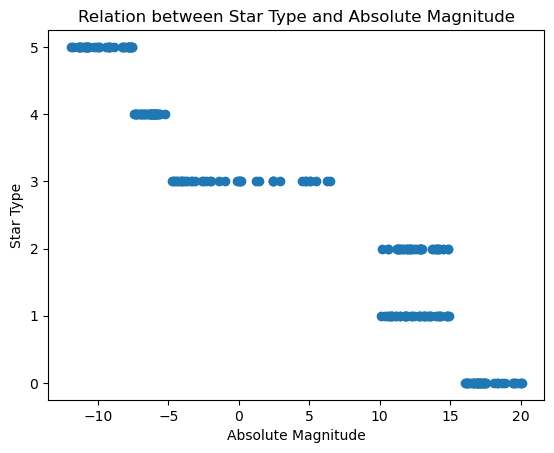

In [9]:
# Create a scatter plot between Star Type and Absolute Magnitude
plt.scatter(df['Absolute magnitude(Mv)'], df['Star type'])
plt.title('Relation between Star Type and Absolute Magnitude')
plt.xlabel('Absolute Magnitude')
plt.ylabel('Star Type')
plt.show()

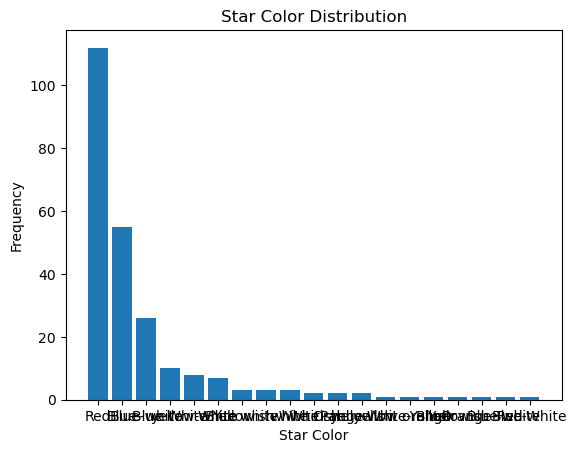

In [10]:
# Plot a bar chart for 'Star Color'
star_color_counts = df['Star color'].value_counts()
plt.bar(star_color_counts.index, star_color_counts.values)
plt.title('Star Color Distribution')
plt.xlabel('Star Color')
plt.ylabel('Frequency')
plt.show()

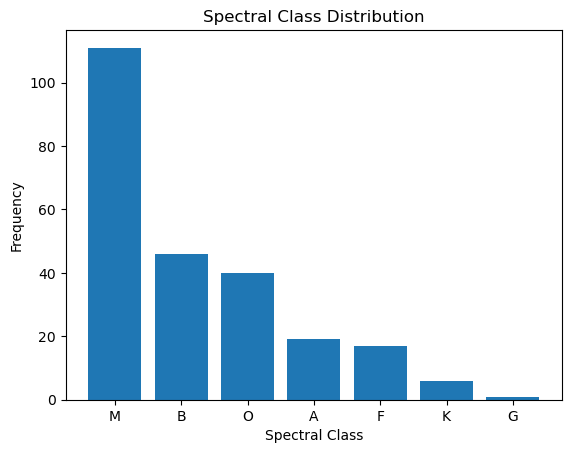

In [11]:
# Plot a bar chart for 'Spectral Class'
spectral_class_counts = df['Spectral Class'].value_counts()
plt.bar(spectral_class_counts.index, spectral_class_counts.values)
plt.title('Spectral Class Distribution')
plt.xlabel('Spectral Class')
plt.ylabel('Frequency')
plt.show()

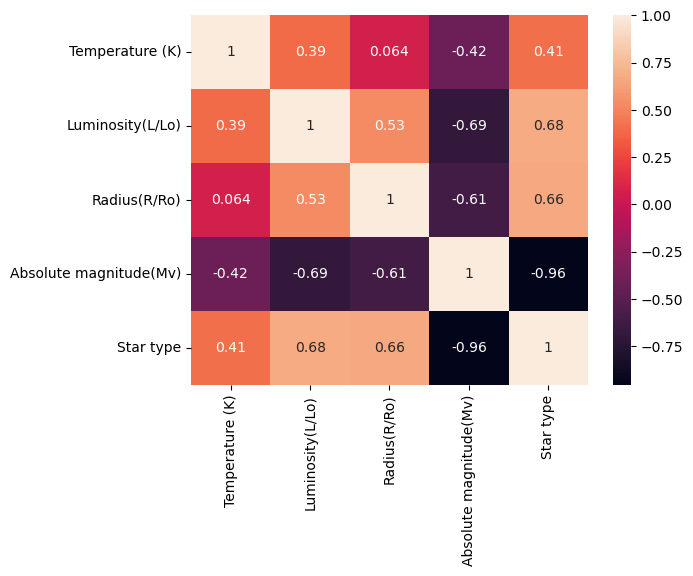

In [12]:
# Calculate the correlation coefficient matrix
corr_matrix = np.corrcoef([df['Temperature (K)'], df['Luminosity(L/Lo)'], 
                           df['Radius(R/Ro)'], df['Absolute magnitude(Mv)'], df['Star type']])

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, 
            xticklabels=['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 
                         'Absolute magnitude(Mv)', 'Star type'], 
            yticklabels=['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 
                         'Absolute magnitude(Mv)', 'Star type'])

plt.show()

In [13]:
color_dummies = pd.get_dummies(df['Star color'])
spectral_dummies = pd.get_dummies(df['Spectral Class'])
df = pd.concat([df.drop(['Star color', 'Spectral Class'], axis=1), color_dummies, spectral_dummies], axis=1)

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop('Star type', axis=1)
y = df['Star type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [15]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=21)

In [17]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=21)

In [18]:
y_pred = rf.predict(X_test) 

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred) 
print('Accuracy:', accuracy) 

Accuracy: 0.9444444444444444


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      1.00      0.96        11
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        14
           4       1.00      0.73      0.85        15
           5       0.80      1.00      0.89        12

    accuracy                           0.94        72
   macro avg       0.95      0.96      0.95        72
weighted avg       0.95      0.94      0.94        72



In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV 

rf = RandomForestClassifier(random_state=21)

# Set the hyperparameters
param_grid = {'n_estimators': [50, 75, 100, 125, 150],
              'max_depth': [2, 3, 4, 5, 6]}

# Use grid search to find the best hyperparameters
clf = GridSearchCV(rf, param_grid, cv=5)
clf.fit(X_train, y_train)
print(f"Best hyperparameters: {clf.best_params_}")

Best hyperparameters: {'max_depth': 4, 'n_estimators': 150}


In [22]:
rf = RandomForestClassifier(n_estimators=clf.best_params_['n_estimators'], 
                             max_depth=clf.best_params_['max_depth'], 
                             random_state=21) 
rf.fit(X_train, y_train) 

RandomForestClassifier(max_depth=4, n_estimators=150, random_state=21)

In [23]:
y_pred = rf.predict(X_test) 

In [24]:
accuracy = accuracy_score(y_test, y_pred) 
print('Accuracy:', accuracy) 

Accuracy: 0.9861111111111112


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        14
           4       0.94      1.00      0.97        15
           5       1.00      0.92      0.96        12

    accuracy                           0.99        72
   macro avg       0.99      0.99      0.99        72
weighted avg       0.99      0.99      0.99        72

